# **Depuración de registros duplicados de la Base de víctimas ​​de la Oficina del Alto Comisionado para la Paz - Descontamina Colombia**
Las características de las zonas donde se registran los accidentes por minas antipersonal, incluyendo baja densidad poblacional, escasa infraestructura y bajo nivel de penetración de los servicios públicos, así como la magnitud del problema por presencia de minas antipersonal, determinan la alta complejidad que envuelve el proceso de gestión de información sobre las actividades relacionadas con las minas antipersonal.

Como parte de su mandato legal, la Oficina del Alto Comisionado para la Paz - Descontamina Colombia, en cuanto a centralizar y consolidar la información de las actividades relativas a minas, ha venido desarrollando procesos de actualización, depuración, verificación y validación permanente de sus registros, mediante diferentes mecanismos tales como los intercambios de información realizados con las organizaciones gubernamentales y no gubernamentales.

Por lo anterior, las bases de información de la Oficina del Alto Comisionado para la Paz - Descontamina Colombia se encuentran en permanente consolidación.
#http://www.accioncontraminas.gov.co/Estadisticas/datos-abiertos

In [4]:
#Librerias 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import branca

import folium  
from folium.plugins import HeatMap
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [5]:
# upload direito do Drive
from google.colab import files
path = "/content/drive/MyDrive/Colab Notebooks/VICTIMAS DE MINAS/Base víctimas 31 de agosto 2021.xlsx"
df = pd.read_excel(path)
print(df.shape)
df.head(3)

(12092, 44)


,tipo de accidente,departamento,municipio,sitio,tipologia,Fecha del accidente,Año,Mes,Coordenadas tomadas con,latitude,longitude,cod_dane_muni,cod_dane_depto,Tipo de lugar,Presunto actor responsable,descripción,Tipo de área,id_imsma evento,accident_guid,condicion,genero,estado,rango de edad,actividad,otra actividad,reporte medico,pertenencia a un grupo etnico,etnia,comunidad,resguardo consejo comunitario,verificado registraduria,victim_guid,id_imsma_victima,amputación-pérdida final,amputación-pérdida inicial,afectación auditiva,afectación visual,esquirla,fractura,Heridas-laceraciones,infeccion,quemadura,Fueza publica pertenece,fecha_de_corte
0,Accidente por MAP,ANTIOQUIA,GRANADA,NaN,Plan de intervención DH,2006-01-04,2006,1,Coordenadas aproximadas a cabecera municipal,6.143703,-75.185183,5313,5,Sin informacion,DESCONOCIDO,04/01/2006 Granada Antioquia Grupo armado sin ...,Rural,ACF_PP_2006_1644879,0a0a-502c-11aa22d53f2-9e042826-3e0c0-,Civil,Masculino,Herido,Menor de 18 años,"Pasando, estando cerca",NaN,Pérdida pierna izquierda,NaN,NaN,NaN,NaN,2015-08-26,0a00-b4ae-126567c279b-8a389bf2-21-62c,VIC_PP_2006_5099,NaN,Si,NaN,Si,NaN,NaN,NaN,NaN,NaN,NaN,2021-08-31
1,Accidente por MAP,CAQUETA,MONTAÑITA,NaN,Tipo I,2009-12-01,2009,12,Coordenadas aproximadas a cabecera municipal,1.494944,-75.463090,18410,18,Sin informacion,SIN INFORMACION,Accidente por MAP CAQUETA MONTAÑITA MONTAÑITA ...,Rural,AFD_PP_2009_912,0a00-b7db-12651de15cd-cd674355-281-6a,Civil,Masculino,Herido,Mayor de 18 años,Erradicador manual - PCI,NaN,NaN,NaN,NaN,NaN,NaN,2015-08-26,0a00-b4ae-12656d2c475-607297b3-d4-12a,VIC_PP_2009_1352,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-08-31
2,Accidente por MAP,PUTUMAYO,PUERTO ASÍS,NaN,Tipo I,2008-04-30,2008,4,Coordenadas aproximadas a cabecera municipal,0.502569,-76.498180,86568,86,Sin informacion,SIN INFORMACION,"Accidente por MAP PUTUMAYO PUERTO ASÍS 0,4964...",Rural,AFD_PP_2008_914,0a00-b4ae-12656e8c4a8-31298414-102-71,Civil,Masculino,Muerto,Mayor de 18 años,Erradicador manual - PCI,NaN,NaN,NaN,NaN,NaN,NaN,2015-08-26,0a00-b4ae-12656ebbf7a-143c68e-111-d67,VIC_PP_2008_1355,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-08-31


In [6]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
# Descripción de variables
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12092 entries, 0 to 12091
Data columns (total 44 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   tipo de accidente              12092 non-null  object        
 1   departamento                   12092 non-null  object        
 2   municipio                      12092 non-null  object        
 3   sitio                          8622 non-null   object        
 4   tipologia                      12090 non-null  object        
 5   Fecha del accidente            12092 non-null  datetime64[ns]
 6   Año                            12092 non-null  int64         
 7   Mes                            12092 non-null  int64         
 8   Coordenadas tomadas con        12092 non-null  object        
 9   latitude                       12092 non-null  float64       
 10  longitude                      12092 non-null  float64       
 11  cod_dane_muni  

In [8]:
#Descripción de estadística descriptiva 
df.describe()

,Año,Mes,latitude,longitude,cod_dane_muni,cod_dane_depto
count,12092.000000,12092.000000,12092.000000,12092.000000,12092.000000,12092.000000
mean,2006.855938,6.117681,4.994658,-74.933402,39244.997767,38.776712
std,5.597424,3.307492,2.738305,1.710116,28378.146567,28.385205
min,1990.000000,1.000000,-0.624722,-78.763936,5001.000000,5.000000
25%,2004.000000,3.000000,2.564031,-76.025341,13670.000000,13.000000
50%,2007.000000,6.000000,5.443056,-75.122094,41306.000000,41.000000
75%,2010.000000,9.000000,7.262083,-73.752373,54800.000000,54.000000
max,2021.000000,12.000000,11.716944,-67.500750,99773.000000,99.000000


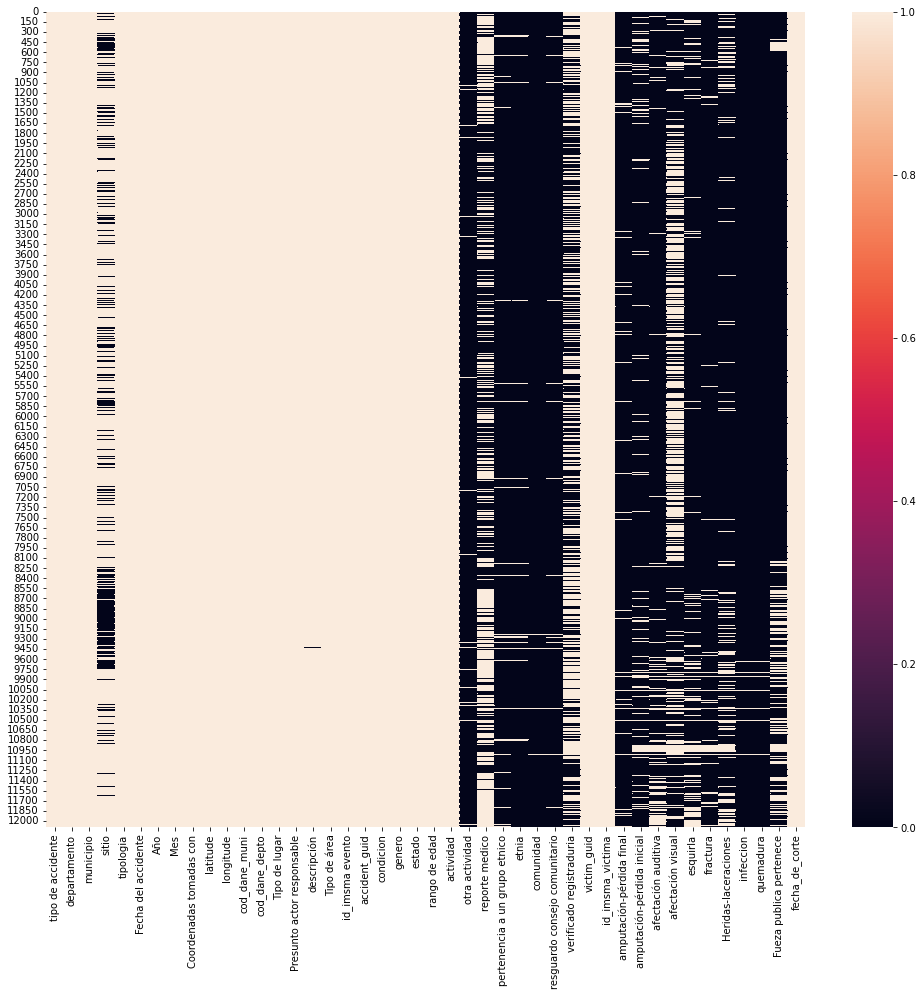

In [9]:
# Verficacao de valores null
f, ax = plt.subplots(figsize=(17, 15))
ax = sns.heatmap(df.notna())

In [10]:
# Remoción de duplicados
df=df.drop_duplicates()
df.head(3)
#NO hay duplicados

,tipo de accidente,departamento,municipio,sitio,tipologia,Fecha del accidente,Año,Mes,Coordenadas tomadas con,latitude,longitude,cod_dane_muni,cod_dane_depto,Tipo de lugar,Presunto actor responsable,descripción,Tipo de área,id_imsma evento,accident_guid,condicion,genero,estado,rango de edad,actividad,otra actividad,reporte medico,pertenencia a un grupo etnico,etnia,comunidad,resguardo consejo comunitario,verificado registraduria,victim_guid,id_imsma_victima,amputación-pérdida final,amputación-pérdida inicial,afectación auditiva,afectación visual,esquirla,fractura,Heridas-laceraciones,infeccion,quemadura,Fueza publica pertenece,fecha_de_corte
0,Accidente por MAP,ANTIOQUIA,GRANADA,NaN,Plan de intervención DH,2006-01-04,2006,1,Coordenadas aproximadas a cabecera municipal,6.143703,-75.185183,5313,5,Sin informacion,DESCONOCIDO,04/01/2006 Granada Antioquia Grupo armado sin ...,Rural,ACF_PP_2006_1644879,0a0a-502c-11aa22d53f2-9e042826-3e0c0-,Civil,Masculino,Herido,Menor de 18 años,"Pasando, estando cerca",NaN,Pérdida pierna izquierda,NaN,NaN,NaN,NaN,2015-08-26,0a00-b4ae-126567c279b-8a389bf2-21-62c,VIC_PP_2006_5099,NaN,Si,NaN,Si,NaN,NaN,NaN,NaN,NaN,NaN,2021-08-31
1,Accidente por MAP,CAQUETA,MONTAÑITA,NaN,Tipo I,2009-12-01,2009,12,Coordenadas aproximadas a cabecera municipal,1.494944,-75.463090,18410,18,Sin informacion,SIN INFORMACION,Accidente por MAP CAQUETA MONTAÑITA MONTAÑITA ...,Rural,AFD_PP_2009_912,0a00-b7db-12651de15cd-cd674355-281-6a,Civil,Masculino,Herido,Mayor de 18 años,Erradicador manual - PCI,NaN,NaN,NaN,NaN,NaN,NaN,2015-08-26,0a00-b4ae-12656d2c475-607297b3-d4-12a,VIC_PP_2009_1352,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-08-31
2,Accidente por MAP,PUTUMAYO,PUERTO ASÍS,NaN,Tipo I,2008-04-30,2008,4,Coordenadas aproximadas a cabecera municipal,0.502569,-76.498180,86568,86,Sin informacion,SIN INFORMACION,"Accidente por MAP PUTUMAYO PUERTO ASÍS 0,4964...",Rural,AFD_PP_2008_914,0a00-b4ae-12656e8c4a8-31298414-102-71,Civil,Masculino,Muerto,Mayor de 18 años,Erradicador manual - PCI,NaN,NaN,NaN,NaN,NaN,NaN,2015-08-26,0a00-b4ae-12656ebbf7a-143c68e-111-d67,VIC_PP_2008_1355,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-08-31


In [11]:
# CONTAR NÚMERO DE "NaN" EN CADA COLUNA
print(df.isnull().sum())

tipo de accidente                    0
departamento                         0
municipio                            0
sitio                             3470
tipologia                            2
Fecha del accidente                  0
Año                                  0
Mes                                  0
Coordenadas tomadas con              0
latitude                             0
longitude                            0
cod_dane_muni                        0
cod_dane_depto                       0
Tipo de lugar                        0
Presunto actor responsable           0
descripción                         15
Tipo de área                         0
id_imsma evento                      0
accident_guid                        0
condicion                            0
genero                               0
estado                               0
rango de edad                        0
actividad                            0
otra actividad                   11888
reporte medico           

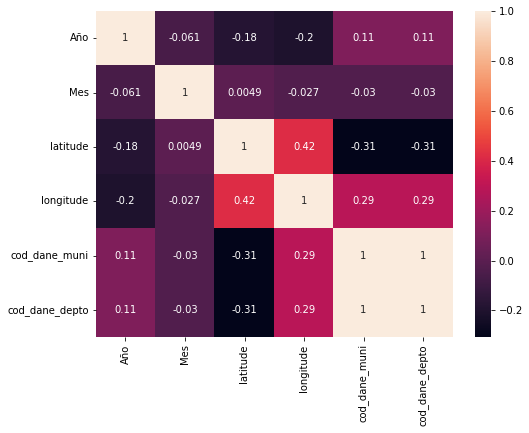

In [12]:
# Correlação Pearson
corr_df = df.corr(method='pearson')
plt.figure(figsize=(8, 6))
sns.heatmap(corr_df, annot=True)
plt.show()

In [13]:
#Dados de coordenadas geoespaciais
my_zip = zip(df['latitude'], df['longitude'])
list_of_my_zip = list(my_zip)

In [14]:
hm_layer = HeatMap(list_of_my_zip,
                   # These are parameters that we tweak manually to adjust color
                   # See folium docs for more information
                   min_opacity=0.5,
                   radius=5,
                   blur=6, 
                 )

In [15]:
folium_map = folium.Map()
ny_coords = [4.570868, -74.297333] # lat, long
folium_map = folium.Map(location=ny_coords,zoom_start=8) #tiles="Stamen Terrain")
folium_map
folium_map.add_child(hm_layer)
folium_map

In [16]:
#Descarrega um arquivo .html para que o usuario poda ver o mapa
folium_map.save("vitimas_de_Minas.html")

In [17]:
#Agrupación para únicamente Nariño
g = df.groupby(by= df['departamento'])
df2 = g.apply(lambda x: x[x['departamento'] == 'NARIÑO'])
df2= pd.DataFrame(df2)
df2.head(3)

tipo de accidente  ... fecha_de_corte
departamento                        ...               
NARIÑO       7   Accidente por MAP  ...     2021-08-31
             13  Accidente por MAP  ...     2021-08-31
             16  Accidente por MAP  ...     2021-08-31

[3 rows x 44 columns]

In [18]:
#Dados de coordenadas geoespaciais
my_zip_narino = zip(df2['latitude'], df2['longitude'])
list_of_my_zip_narino = list(my_zip_narino)

In [19]:
hm_layer_narino = HeatMap(list_of_my_zip_narino,
                   # These are parameters that we tweak manually to adjust color
                   # See folium docs for more information
                   min_opacity=1,
                   radius=5,
                   blur=6, 
                 )

In [20]:
folium_map = folium.Map()
ny_coords = [1.283, -77.367] # lat, long
folium_map = folium.Map(location=ny_coords,zoom_start=8) 
folium_map
folium_map.add_child(hm_layer_narino)
folium_map

In [21]:
#Descarrega um arquivo .html para que o usuario poda ver o mapa
folium_map.save("vitimas_de_Minas_nariño.html")

In [22]:
df["departamento"].value_counts()

ANTIOQUIA             2616
META                  1140
NARIÑO                1037
NORTE DE SANTANDER     950
CAQUETA                950
ARAUCA                 652
BOLIVAR                636
CAUCA                  616
TOLIMA                 539
PUTUMAYO               454
SANTANDER              289
CORDOBA                281
VALLE DEL CAUCA        268
GUAVIARE               266
HUILA                  236
CHOCO                  188
CALDAS                 168
CESAR                  158
CUNDINAMARCA           141
CASANARE                91
BOYACA                  78
SUCRE                   75
LA GUAJIRA              60
MAGDALENA               46
VAUPES                  44
BOGOTA DC               30
QUINDIO                 28
RISARALDA               22
VICHADA                 18
ATLANTICO                8
AMAZONAS                 4
GUAINIA                  3
Name: departamento, dtype: int64

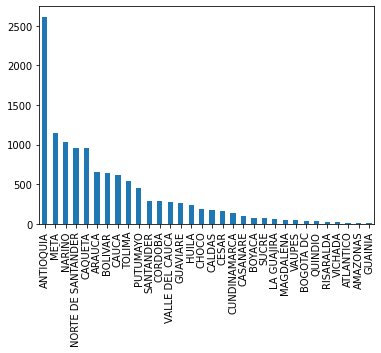

In [23]:
plot_municipios = df["departamento"].value_counts()
plot_municipios.plot.bar() 

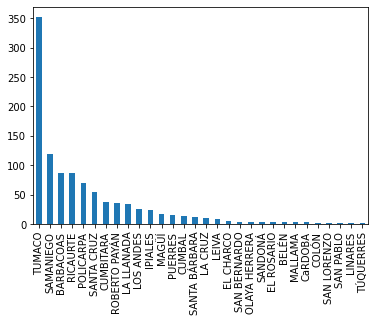

In [24]:
plot_municipios = df2["municipio"].value_counts()
plot_municipios.plot.bar() 

In [25]:
df["municipio"].value_counts()

VISTAHERMOSA              370
TUMACO                    352
TAME                      348
TARAZÁ                    271
SAN VICENTE DEL CAGUÁN    267
                         ... 
PIAMONTE                    1
RIO QUITO                   1
FONSECA                     1
LIBORINA                    1
MACHETÁ                     1
Name: municipio, Length: 495, dtype: int64

In [26]:
df["Año"].value_counts()

2006    1224
2005    1175
2007     980
2004     899
2008     852
2009     771
2003     759
2010     679
2002     631
2012     590
2011     564
2013     422
2001     299
2014     293
2015     223
2018     179
2020     173
1992     153
2000     138
1995     130
1996     120
2019     114
2021     103
1997      96
2016      90
1993      87
1994      85
1991      70
1998      59
2017      57
1999      54
1990      23
Name: Año, dtype: int64

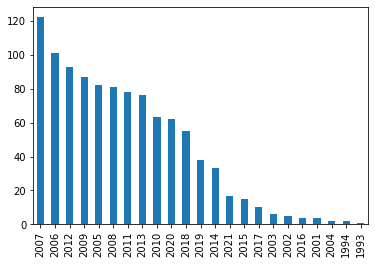

In [27]:
#AÑOS DE MAYOR CANTIDAD DE VICTIMAS PARA NARIÑO
plot_municipios = df2["Año"].value_counts()
plot_municipios.plot.bar() 

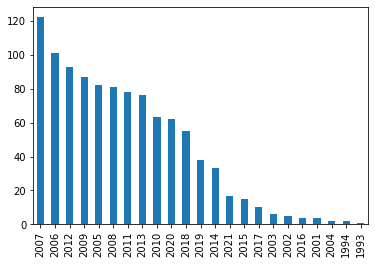

In [28]:
plot_municipios.plot.bar()

In [29]:
df["Mes"].value_counts()

3     1289
2     1222
4     1109
5     1097
6     1071
8     1038
10     996
7      991
9      915
1      879
11     818
12     667
Name: Mes, dtype: int64

In [30]:
df["Coordenadas tomadas con"].value_counts()

Coordenadas aproximadas a cabecera municipal    6652
Coordenadas tomadas con GPS                     4926
Punto de referencia                              323
Coordenadas tomadas planchas IGAC                 98
Coordenadas tomadas puntos OASIS                  93
Name: Coordenadas tomadas con, dtype: int64

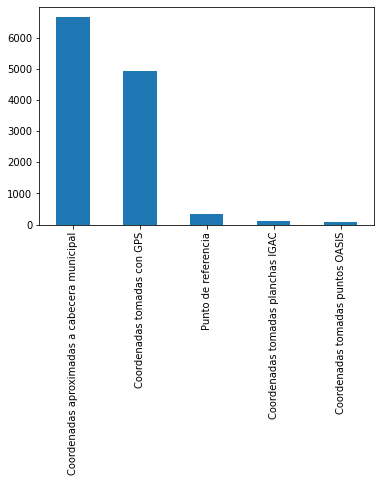

In [31]:
plot_municipios = df["Coordenadas tomadas con"].value_counts()
plot_municipios.plot.bar() 

In [32]:
df["Presunto actor responsable"].value_counts()

FARC                         5412
SIN INFORMACION              2787
DESCONOCIDO                  2656
ELN                           876
GUERRILLA NO IDENTIFICADA     245
GAO-RESIDUAL FARC              67
FUERZAS MILITARES              19
GAO                            12
AUTODEFENSAS                   12
OTRAS GUERRILLAS                3
ELN y FARC                      2
NARCOTRAFICANTES                1
Name: Presunto actor responsable, dtype: int64

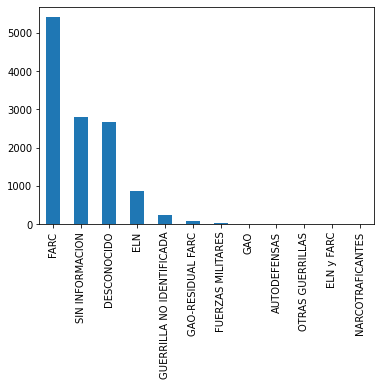

In [33]:
plot_municipios = df["Presunto actor responsable"].value_counts()
plot_municipios.plot.bar() 

In [34]:
df["Tipo de área"].value_counts()

Rural     11847
Urbana      245
Name: Tipo de área, dtype: int64

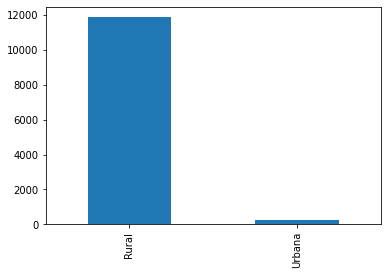

In [35]:
plot_municipios = df["Tipo de área"].value_counts()
plot_municipios.plot.bar() 

In [36]:
df["condicion"].value_counts()

Fuerza pública    7263
Civil             4829
Name: condicion, dtype: int64

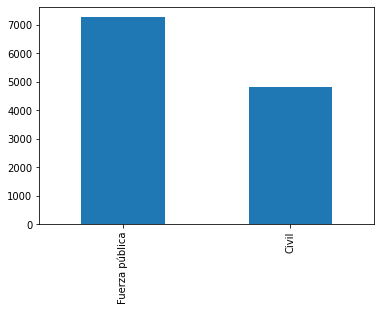

In [37]:
plot_municipios = df["condicion"].value_counts()
plot_municipios.plot.bar() 

In [38]:
df["genero"].value_counts()

Masculino          11406
Femenino             646
Sin Información       40
Name: genero, dtype: int64

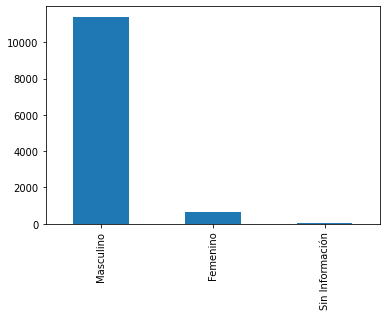

In [39]:
plot_municipios = df["genero"].value_counts()
plot_municipios.plot.bar() 

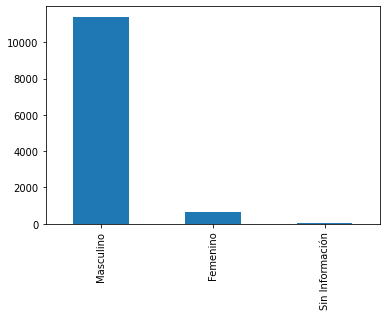

In [40]:
cplot_municipios = df["genero"].value_counts()
plot_municipios.plot.bar() 

In [41]:
df["estado"].value_counts()

Herido    9762
Muerto    2330
Name: estado, dtype: int64

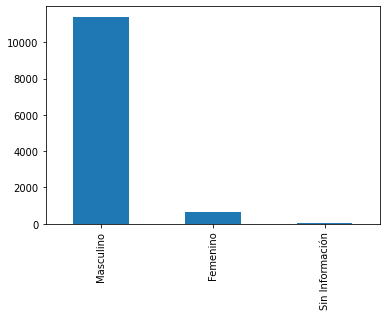

In [42]:
cplot_municipios = df2["estado"].value_counts()
plot_municipios.plot.bar() 

In [43]:
df["rango de edad"].value_counts()

Mayor de 18 años    10832
Menor de 18 años     1260
Name: rango de edad, dtype: int64

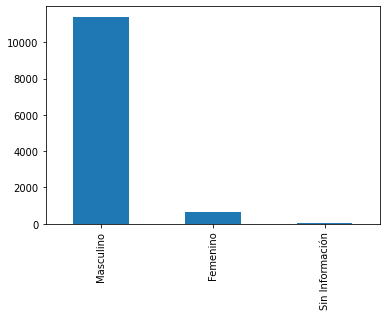

In [44]:
cplot_municipios = df2["rango de edad"].value_counts()
plot_municipios.plot.bar() 

In [45]:
df["Fueza publica pertenece"].value_counts()

Ejército Nacional    1553
Policía Nacional      155
Armada Nacional         4
Name: Fueza publica pertenece, dtype: int64

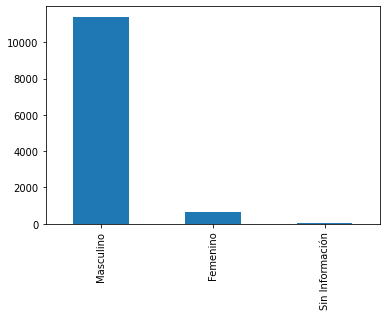

In [46]:
cplot_municipios = df["Fueza publica pertenece"].value_counts()
plot_municipios.plot.bar() 

In [47]:
# Tranformaco de tempo e datetime e novas variaveis de mes e ano
df['Fecha del accidente']=pd.to_datetime(df['Fecha del accidente']).dt.date
df['Día']=pd.to_datetime(df['Fecha del accidente']).dt.day 
df['Mes']=pd.to_datetime(df['Mes']).dt.month
df['Año'] = pd.to_datetime(df['Año']).dt.year
df.dtypes

tipo de accidente                        object
departamento                             object
municipio                                object
sitio                                    object
tipologia                                object
Fecha del accidente                      object
Año                                       int64
Mes                                       int64
Coordenadas tomadas con                  object
latitude                                float64
longitude                               float64
cod_dane_muni                             int64
cod_dane_depto                            int64
Tipo de lugar                            object
Presunto actor responsable               object
descripción                              object
Tipo de área                             object
id_imsma evento                          object
accident_guid                            object
condicion                                object
genero                                  

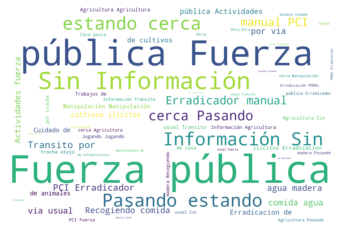

In [48]:
#PARA TODO COLOMBIA

#Stopword list:
stopwords = set(STOPWORDS)
stopwords.update(["|", "-", "NaN"])

# Word cloud image

text = ' '.join(df['actividad'].astype('str'))
wordcloud = WordCloud(width = 1500, height = 1000, stopwords=stopwords, max_font_size=200, max_words=200, background_color="white").generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

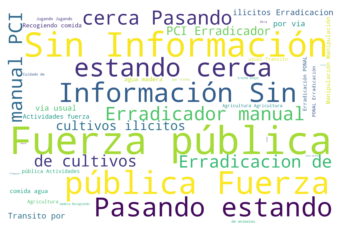

In [49]:
#PARA NARIÑO
#Stopword list:
stopwords = set(STOPWORDS)
stopwords.update(["|", "-", "NaN"])

# Word cloud image

text = ' '.join(df2['actividad'].astype('str'))
wordcloud = WordCloud(width = 1500, height = 1000, stopwords=stopwords, max_font_size=200, max_words=200, background_color="white").generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

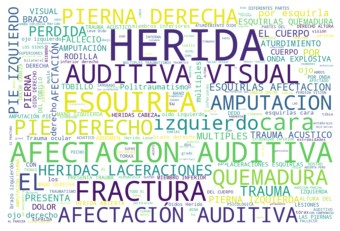

In [50]:
#REPORTE MÉDICO PARA COLOMBIA

#Stopword list:
stopwords = set(STOPWORDS)
stopwords.update(["|", "I", "-", "de", "en","la", "NaN", "UNA", "UN",'y'])

# Word cloud image

text = ' '.join(df2['reporte medico'].astype('str'))
wordcloud = WordCloud(width = 1500, height = 1000, stopwords=stopwords, max_font_size=200, max_words=200, background_color="white").generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

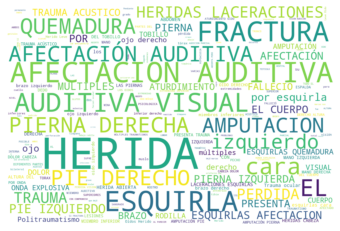

In [51]:
#REPORTE MÉDICO PARA NARIÑO
#Stopword list:
stopwords = set(STOPWORDS)
stopwords.update(["|", "I", "-", "de", "en","la", "NaN", "UNA", "UN",'y'])

# Word cloud image

text = ' '.join(df2['reporte medico'].astype('str'))
wordcloud = WordCloud(width = 1500, height = 1000, stopwords=stopwords, max_font_size=200, max_words=200, background_color="white").generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [52]:
#Elimina as  filas duplicadas do Presunto actor responsable
df["Presunto actor responsable"].drop_duplicates()

0                      DESCONOCIDO
1                  SIN INFORMACION
7                              ELN
8                             FARC
92       GUERRILLA NO IDENTIFICADA
360              FUERZAS MILITARES
1873                  AUTODEFENSAS
3260                    ELN y FARC
8985              NARCOTRAFICANTES
11599            GAO-RESIDUAL FARC
11617                          GAO
11867             OTRAS GUERRILLAS
Name: Presunto actor responsable, dtype: object

In [53]:
#Elimina as  filas duplicadas do Presunto actor responsable
df["departamento"].drop_duplicates()

0                 ANTIOQUIA
1                   CAQUETA
2                  PUTUMAYO
3                   CORDOBA
7                    NARIÑO
10                    CAUCA
17                 GUAVIARE
19                     META
20       NORTE DE SANTANDER
28                  BOLIVAR
43                    HUILA
46          VALLE DEL CAUCA
51                   VAUPES
62                   ARAUCA
71                   TOLIMA
102                CASANARE
204                 VICHADA
226                   CHOCO
282               SANTANDER
349                   CESAR
380              LA GUAJIRA
445            CUNDINAMARCA
774                  CALDAS
949               BOGOTA DC
1050              MAGDALENA
1159                  SUCRE
1205                QUINDIO
1387                 BOYACA
2104                GUAINIA
3835              RISARALDA
4856              ATLANTICO
10530              AMAZONAS
Name: departamento, dtype: object

In [54]:
df2.dtypes

tipo de accidente                        object
departamento                             object
municipio                                object
sitio                                    object
tipologia                                object
Fecha del accidente              datetime64[ns]
Año                                       int64
Mes                                       int64
Coordenadas tomadas con                  object
latitude                                float64
longitude                               float64
cod_dane_muni                             int64
cod_dane_depto                            int64
Tipo de lugar                            object
Presunto actor responsable               object
descripción                              object
Tipo de área                             object
id_imsma evento                          object
accident_guid                            object
condicion                                object
genero                                  

In [55]:
df2.head()

tipo de accidente  ... fecha_de_corte
departamento                         ...               
NARIÑO       7    Accidente por MAP  ...     2021-08-31
             13   Accidente por MAP  ...     2021-08-31
             16   Accidente por MAP  ...     2021-08-31
             63   Accidente por MAP  ...     2021-08-31
             109  Accidente por MAP  ...     2021-08-31

[5 rows x 44 columns]

In [56]:
df2

tipo de accidente  ... fecha_de_corte
departamento                           ...               
NARIÑO       7      Accidente por MAP  ...     2021-08-31
             13     Accidente por MAP  ...     2021-08-31
             16     Accidente por MAP  ...     2021-08-31
             63     Accidente por MAP  ...     2021-08-31
             109    Accidente por MAP  ...     2021-08-31
...                               ...  ...            ...
             12059  Accidente por MAP  ...     2021-08-31
             12065  Accidente por MAP  ...     2021-08-31
             12072  Accidente por MAP  ...     2021-08-31
             12074  Accidente por MAP  ...     2021-08-31
             12090  Accidente por MAP  ...     2021-08-31

[1037 rows x 44 columns]

In [57]:
# SUPRIMIR COLUMNAS
df3 =df2.drop(columns=['departamento','tipo de accidente','sitio', 'tipologia',
'Fecha del accidente', 'Mes' ,'Año' , 'Coordenadas tomadas con', 'latitude',                                
'longitude', 'cod_dane_muni','cod_dane_depto','Tipo de lugar',  
'descripción','Presunto actor responsable', 'id_imsma evento',
'accident_guid', 'etnia','comunidad','resguardo consejo comunitario',
'verificado registraduria', 'victim_guid','id_imsma_victima','fecha_de_corte','otra actividad','reporte medico','rango de edad','actividad','pertenencia a un grupo etnico'])

In [58]:
df4= df3.reset_index(drop=True)

In [59]:
# SUPRIMIR COLUMNAS
df4.head()

,municipio,Tipo de área,condicion,genero,estado,amputación-pérdida final,amputación-pérdida inicial,afectación auditiva,afectación visual,esquirla,fractura,Heridas-laceraciones,infeccion,quemadura,Fueza publica pertenece
0,BARBACOAS,Rural,Fuerza pública,Masculino,Herido,NaN,Si,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,SANTA CRUZ,Rural,Civil,Femenino,Herido,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,RICAURTE,Rural,Civil,Femenino,Muerto,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,SAMANIEGO,Rural,Fuerza pública,Masculino,Herido,NaN,Si,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,SAMANIEGO,Rural,Fuerza pública,Masculino,Herido,NaN,Si,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [60]:
df5= pd.get_dummies(df4, columns=['municipio','Tipo de área','condicion','genero',])
df5

,estado,amputación-pérdida final,amputación-pérdida inicial,afectación auditiva,afectación visual,esquirla,fractura,Heridas-laceraciones,infeccion,quemadura,Fueza publica pertenece,municipio_BARBACOAS,municipio_BELÉN,municipio_COLÓN,municipio_CUMBAL,municipio_CUMBITARA,municipio_CaRDOBA,municipio_EL CHARCO,municipio_EL ROSARIO,municipio_IPIALES,municipio_LA CRUZ,municipio_LA LLANADA,municipio_LEIVA,municipio_LINARES,municipio_LOS ANDES,municipio_MAGÜÍ,municipio_MALLAMA,municipio_OLAYA HERRERA,municipio_POLICARPA,municipio_PUERRES,municipio_RICAURTE,municipio_ROBERTO PAYÁN,municipio_SAMANIEGO,municipio_SAN BERNARDO,municipio_SAN LORENZO,municipio_SAN PABLO,municipio_SANDONÁ,municipio_SANTA BÁRBARA,municipio_SANTA CRUZ,municipio_TUMACO,municipio_TÚQUERRES,Tipo de área_Rural,Tipo de área_Urbana,condicion_Civil,condicion_Fuerza pública,genero_Femenino,genero_Masculino,genero_Sin Información
0,Herido,NaN,Si,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0
1,Herido,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,1,0,0
2,Muerto,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0
3,Herido,NaN,Si,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0
4,Herido,NaN,Si,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1032,Herido,NaN,NaN,Si,NaN,Si,NaN,Si,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,1,0
1033,Herido,NaN,NaN,Si,NaN,Si,NaN,Si,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0
1034,Herido,NaN,NaN,Si,NaN,Si,NaN,Si,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0
1035,Herido,NaN,NaN,NaN,NaN,Si,Si,Si,NaN,NaN,Ejército Nacional,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,1,0


In [61]:
df5.isna().sum()

estado                           0
amputación-pérdida final      1007
amputación-pérdida inicial     933
afectación auditiva            801
afectación visual              640
esquirla                       857
fractura                       954
Heridas-laceraciones           806
infeccion                     1033
quemadura                     1033
Fueza publica pertenece        838
municipio_BARBACOAS              0
municipio_BELÉN                  0
municipio_COLÓN                  0
municipio_CUMBAL                 0
municipio_CUMBITARA              0
municipio_CaRDOBA                0
municipio_EL CHARCO              0
municipio_EL ROSARIO             0
municipio_IPIALES                0
municipio_LA CRUZ                0
municipio_LA LLANADA             0
municipio_LEIVA                  0
municipio_LINARES                0
municipio_LOS ANDES              0
municipio_MAGÜÍ                  0
municipio_MALLAMA                0
municipio_OLAYA HERRERA          0
municipio_POLICARPA 

In [62]:
df5["estado"].replace({'Herido': 0,'Muerto':1},inplace=True)

In [63]:
df5["estado"].value_counts()

0    800
1    237
Name: estado, dtype: int64

In [64]:
df5["amputación-pérdida final"].replace({'Si': 1},inplace=True)

In [65]:
df5["amputación-pérdida final"].value_counts()

1.0    30
Name: amputación-pérdida final, dtype: int64

In [66]:
df5["amputación-pérdida inicial"].replace({'Si': 1,'No':0},inplace=True)

In [67]:
df5["amputación-pérdida inicial"].value_counts()

1.0    85
0.0    19
Name: amputación-pérdida inicial, dtype: int64

In [68]:
df5["afectación auditiva"].replace({'Si': 1,'No':0},inplace=True)

In [69]:
df5["afectación auditiva"].value_counts()

1.0    215
0.0     21
Name: afectación auditiva, dtype: int64

In [70]:
df5["afectación visual"].replace({'Si': 1,'No':0},inplace=True)

In [71]:
df5["afectación visual"].value_counts()

1.0    374
0.0     23
Name: afectación visual, dtype: int64

In [72]:
df5["esquirla"].replace({'Si': 1,'No':0},inplace=True)

In [73]:
df5["esquirla"].value_counts()

1.0    162
0.0     18
Name: esquirla, dtype: int64

In [74]:
df5["fractura"].replace({'Si': 1,'No':0},inplace=True)

In [75]:
df5["fractura"].value_counts()

1.0    61
0.0    22
Name: fractura, dtype: int64

In [76]:
df5["Heridas-laceraciones"].replace({'Si': 1,'No':0},inplace=True)

In [77]:
df5["Heridas-laceraciones"].value_counts()

1.0    207
0.0     24
Name: Heridas-laceraciones, dtype: int64

In [78]:
df5["infeccion"].replace({'Si': 1,'No':0},inplace=True)

In [79]:
df5["infeccion"].value_counts()

1.0    3
0.0    1
Name: infeccion, dtype: int64

In [80]:
df5["quemadura"].replace({'Si': 1,'No':0},inplace=True)

In [81]:
df5["quemadura"].value_counts()

1.0    3
0.0    1
Name: quemadura, dtype: int64

In [82]:
df5["Fueza publica pertenece"].replace({'Ejército Nacional': 1,'Policía Nacional':0},inplace=True)

In [83]:
df5["Fueza publica pertenece"].value_counts()

1.0    139
0.0     60
Name: Fueza publica pertenece, dtype: int64

In [84]:
df5

,estado,amputación-pérdida final,amputación-pérdida inicial,afectación auditiva,afectación visual,esquirla,fractura,Heridas-laceraciones,infeccion,quemadura,Fueza publica pertenece,municipio_BARBACOAS,municipio_BELÉN,municipio_COLÓN,municipio_CUMBAL,municipio_CUMBITARA,municipio_CaRDOBA,municipio_EL CHARCO,municipio_EL ROSARIO,municipio_IPIALES,municipio_LA CRUZ,municipio_LA LLANADA,municipio_LEIVA,municipio_LINARES,municipio_LOS ANDES,municipio_MAGÜÍ,municipio_MALLAMA,municipio_OLAYA HERRERA,municipio_POLICARPA,municipio_PUERRES,municipio_RICAURTE,municipio_ROBERTO PAYÁN,municipio_SAMANIEGO,municipio_SAN BERNARDO,municipio_SAN LORENZO,municipio_SAN PABLO,municipio_SANDONÁ,municipio_SANTA BÁRBARA,municipio_SANTA CRUZ,municipio_TUMACO,municipio_TÚQUERRES,Tipo de área_Rural,Tipo de área_Urbana,condicion_Civil,condicion_Fuerza pública,genero_Femenino,genero_Masculino,genero_Sin Información
0,0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0
1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,1,0,0
2,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0
3,0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0
4,0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1032,0,NaN,NaN,1.0,NaN,1.0,NaN,1.0,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,1,0
1033,0,NaN,NaN,1.0,NaN,1.0,NaN,1.0,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0
1034,0,NaN,NaN,1.0,NaN,1.0,NaN,1.0,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0
1035,0,NaN,NaN,NaN,NaN,1.0,1.0,1.0,NaN,NaN,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,1,0


In [85]:
df6 =df5.drop(columns=["amputación-pérdida final",
"amputación-pérdida inicial",
"afectación auditiva",
"afectación visual",
"esquirla",
"fractura", 
"Heridas-laceraciones",	
"infeccion",	
"quemadura",
"Fueza publica pertenece"])

In [86]:
df6.shape

(1037, 38)

In [87]:
df6.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1037 entries, 0 to 1036
Data columns (total 38 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   estado                    1037 non-null   int64
 1   municipio_BARBACOAS       1037 non-null   uint8
 2   municipio_BELÉN           1037 non-null   uint8
 3   municipio_COLÓN           1037 non-null   uint8
 4   municipio_CUMBAL          1037 non-null   uint8
 5   municipio_CUMBITARA       1037 non-null   uint8
 6   municipio_CaRDOBA         1037 non-null   uint8
 7   municipio_EL CHARCO       1037 non-null   uint8
 8   municipio_EL ROSARIO      1037 non-null   uint8
 9   municipio_IPIALES         1037 non-null   uint8
 10  municipio_LA CRUZ         1037 non-null   uint8
 11  municipio_LA LLANADA      1037 non-null   uint8
 12  municipio_LEIVA           1037 non-null   uint8
 13  municipio_LINARES         1037 non-null   uint8
 14  municipio_LOS ANDES       1037 non-null 

In [88]:
# Generacioón de muestars aleatorias de entrenamiento y test
from sklearn.model_selection import train_test_split
train, test = train_test_split(df6, test_size=0.2)

In [89]:
# Creación de  df_train e df_test - muestras de train y test
train.to_csv('df_train.csv', index=False, encoding='utf-8')
test.to_csv('df_test.csv', index=False, encoding='utf-8')

In [90]:
%load_ext rpy2.ipython

In [91]:
%%R
path = "/content/drive/MyDrive/Colab Notebooks/VICTIMAS DE MINAS/df_test.csv"
datos<- read.csv(file = path, header = TRUE)
head(datos)

  estado municipio_BARBACOAS municipio_BELÉN municipio_COLÓN municipio_CUMBAL
1      0                   0               0               0                0
2      0                   0               0               0                0
3      0                   0               0               0                0
4      1                   0               0               0                0
5      0                   0               0               0                0
6      0                   0               0               0                0
  municipio_CUMBITARA municipio_CaRDOBA municipio_EL.CHARCO
1                   0                 0                   0
2                   0                 0                   0
3                   0                 0                   0
4                   0                 0                   0
5                   0                 0                   0
6                   0                 0                   0
  municipio_EL.ROSARIO municipio_I

In [92]:
%%R
# Removiendo Columnas de datos que no contribuyen con el modelo
datos$X <- NULL
head(datos)

  estado municipio_BARBACOAS municipio_BELÉN municipio_COLÓN municipio_CUMBAL
1      0                   0               0               0                0
2      0                   0               0               0                0
3      0                   0               0               0                0
4      1                   0               0               0                0
5      0                   0               0               0                0
6      0                   0               0               0                0
  municipio_CUMBITARA municipio_CaRDOBA municipio_EL.CHARCO
1                   0                 0                   0
2                   0                 0                   0
3                   0                 0                   0
4                   0                 0                   0
5                   0                 0                   0
6                   0                 0                   0
  municipio_EL.ROSARIO municipio_I

In [93]:
%%R
datosf<-datos[,c(1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38)]
str(datosf)
#dadosf$Arrest = as.numeric(as.character(dadosf$Arrest)) # apenas convertendo de char para numeric

'data.frame':	208 obs. of  38 variables:
 $ estado                  : int  0 0 0 1 0 0 0 0 0 1 ...
 $ municipio_BARBACOAS     : int  0 0 0 0 0 0 0 0 0 0 ...
 $ municipio_BELÉN         : int  0 0 0 0 0 0 0 0 0 0 ...
 $ municipio_COLÓN         : int  0 0 0 0 0 0 0 0 0 0 ...
 $ municipio_CUMBAL        : int  0 0 0 0 0 0 0 0 0 0 ...
 $ municipio_CUMBITARA     : int  0 0 0 0 0 0 0 0 0 0 ...
 $ municipio_CaRDOBA       : int  0 0 0 0 0 0 0 0 0 0 ...
 $ municipio_EL.CHARCO     : int  0 0 0 0 0 0 0 0 0 0 ...
 $ municipio_EL.ROSARIO    : int  0 0 0 0 0 0 0 0 0 0 ...
 $ municipio_IPIALES       : int  0 0 0 0 0 0 0 0 0 0 ...
 $ municipio_LA.CRUZ       : int  0 0 0 0 0 0 0 0 0 0 ...
 $ municipio_LA.LLANADA    : int  0 0 0 0 0 0 0 0 0 0 ...
 $ municipio_LEIVA         : int  0 0 0 0 0 0 0 0 0 0 ...
 $ municipio_LINARES       : int  0 0 0 0 0 0 0 0 0 0 ...
 $ municipio_LOS.ANDES     : int  0 0 0 0 0 0 0 0 0 0 ...
 $ municipio_MAGÜÍ         : int  0 0 0 0 0 1 0 0 0 0 ...
 $ municipio_MALLAMA       : in

In [94]:
%%R
## Trabajando con la variable respuesta (estado)
# tiene 48 variables
table(datos[,1])


  0   1 
161  47 


In [95]:
%%R
# Secuencia incial para generar el modelo:
#variable dependediente estado( 1 muerto, 0 herido)
Y<-datosf[,1]
head(Y)
X<-cbind(datosf[,c(2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38)])
head(X)
#

  municipio_BARBACOAS municipio_BELÉN municipio_COLÓN municipio_CUMBAL
1                   0               0               0                0
2                   0               0               0                0
3                   0               0               0                0
4                   0               0               0                0
5                   0               0               0                0
6                   0               0               0                0
  municipio_CUMBITARA municipio_CaRDOBA municipio_EL.CHARCO
1                   0                 0                   0
2                   0                 0                   0
3                   0                 0                   0
4                   0                 0                   0
5                   0                 0                   0
6                   0                 0                   0
  municipio_EL.ROSARIO municipio_IPIALES municipio_LA.CRUZ municipio_LA.LLANADA
1  

In [96]:
%%R
#### ajustando un modelo de regreción logística
#
modlin<-glm(Y~.,data=X,family=binomial(link="logit")) 
summary(modlin)


Call:
glm(formula = Y ~ ., family = binomial(link = "logit"), data = X)

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-1.45716  -0.72214  -0.59437  -0.00022   2.41270  

Coefficients: (13 not defined because of singularities)
                           Estimate Std. Error z value Pr(>|z|)   
(Intercept)               -17.74652 3956.18041  -0.004  0.99642   
municipio_BARBACOAS        -0.13327    0.71447  -0.187  0.85203   
municipio_BELÉN                  NA         NA      NA       NA   
municipio_COLÓN                  NA         NA      NA       NA   
municipio_CUMBAL            0.48978    1.30596   0.375  0.70764   
municipio_CUMBITARA        -0.08733    0.84794  -0.103  0.91797   
municipio_CaRDOBA         -16.04133 3956.18035  -0.004  0.99676   
municipio_EL.CHARCO       -16.04133 3956.18035  -0.004  0.99676   
municipio_EL.ROSARIO             NA         NA      NA       NA   
municipio_IPIALES           1.52474    1.08342   1.407  0.15933   
municipio

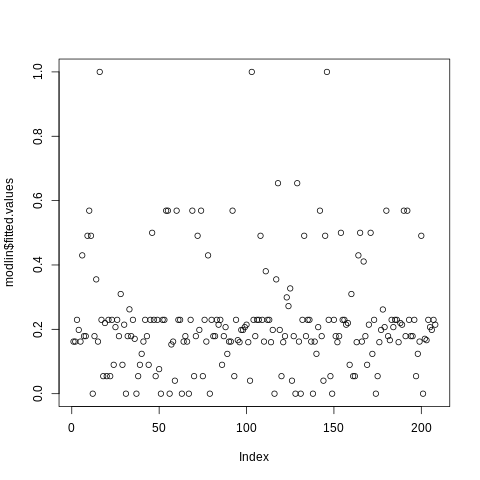

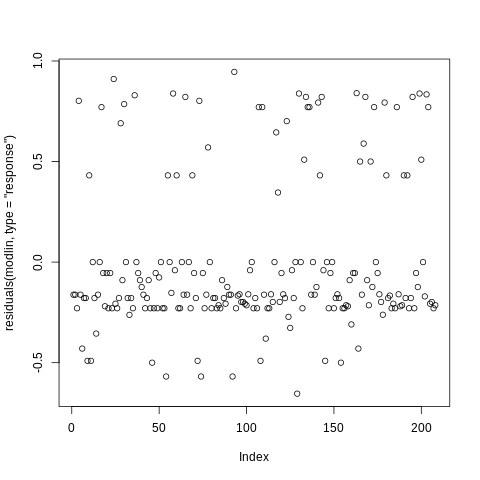

In [97]:
%%R 
# ou modlin<-glm(Y~X[,1]+X[,2]+X[,3]+X[,4]+X[,5]+X[,6],family=binomial(link="logit"))
summary(modlin)
plot(modlin$fitted.values)
plot(residuals(modlin,type='response')) # resíduos ordinários
# modlin<-glm(Y~X[,1]+X[,2]+X[,3]+X[,4]+X[,5]+X[,6]-1,family=binomial(link="logit")) # fazendo beta_0=0, no caso dele ser não significativo ou se fizer sentido prático que ele seja igual a zero
#

In [98]:
%%R
#### análise de diagnóstico
#
res.pear<-residuals(modlin,type='pearson')

In [99]:
%%R
# a função modlin$residuals traz os resíduos chamados de working resíduos que é a diferença entre os valores observados e o preditor linear, que não vamos usar aqui
des.res<-residuals(modlin,type='deviance') # desvio residual
#

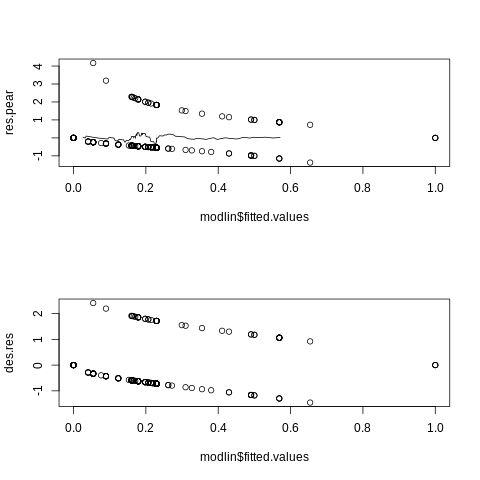

In [100]:
%%R
res_pred<-cbind(modlin$fitted.values,res.pear)
res_pred<-res_pred[order(modlin$fitted.values),]
res.med.mov<-NULL
pred.med.mov<-NULL
cont<-1
jan<-30
for (i in 1:(length(res.pear)-jan)){
	res.med.mov[cont]<-mean(res_pred[i:(i+jan),2])
	pred.med.mov[cont]<-mean(res_pred[i:(i+jan),1])	
	cont<-cont+1}
par(mfrow=c(2,1))
plot(modlin$fitted.values,res.pear)
lines(pred.med.mov,res.med.mov)
plot(modlin$fitted.values,des.res)
#

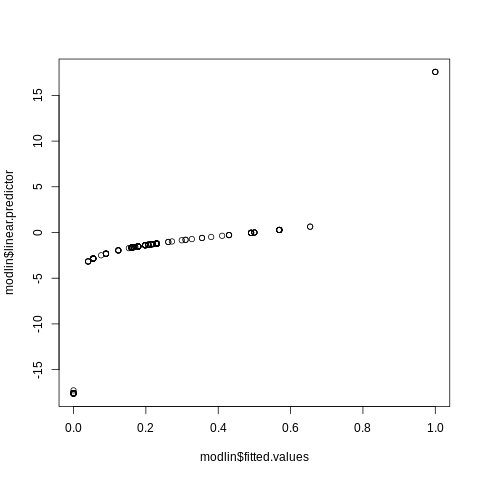

In [101]:
%%R
plot(modlin$fitted.values,modlin$linear.predictor)
#
### Tasa correcta de clasificación
#

 [1] 0.495 0.500 0.505 0.510 0.515 0.520 0.525 0.530 0.535 0.540 0.545 0.550
[13] 0.555 0.560 0.565


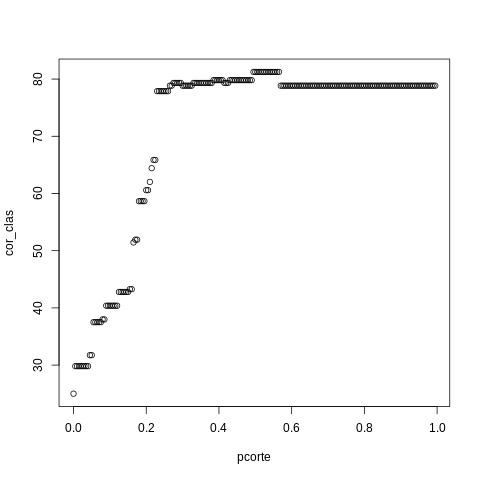

In [102]:
%%R
cor_clas<-NULL
pcorte<-seq(from=min(modlin$fitted.values),to=max(modlin$fitted.values),by=0.005)
for (i in 1:length(pcorte)){
	classif<-ifelse(modlin$fitted.values>pcorte[i],1,0)
	cor_clas[i]<-(table(Y,classif)[1,1]+table(Y,classif)[2,2])/nrow(X)*100}
plot(pcorte,cor_clas)
pcorte[cor_clas==max(cor_clas)]
#

In [103]:
%%R
classif<-ifelse(modlin$fitted.values>pcorte[cor_clas==max(cor_clas)],1,0)
table(classif,Y)
#

       Y
classif   0   1
      0 156  35
      1   5  12


 [1] 0.655 0.660 0.665 0.670 0.675 0.680 0.685 0.690 0.695 0.700 0.705 0.710
[13] 0.715 0.720 0.725 0.730 0.735 0.740 0.745 0.750 0.755 0.760 0.765 0.770
[25] 0.775 0.780 0.785 0.790 0.795 0.800 0.805 0.810 0.815 0.820 0.825 0.830
[37] 0.835 0.840 0.845 0.850 0.855 0.860 0.865 0.870 0.875 0.880 0.885 0.890
[49] 0.895 0.900 0.905 0.910 0.915 0.920 0.925 0.930 0.935 0.940 0.945 0.950
[61] 0.955 0.960 0.965 0.970 0.975 0.980 0.985 0.990 0.995


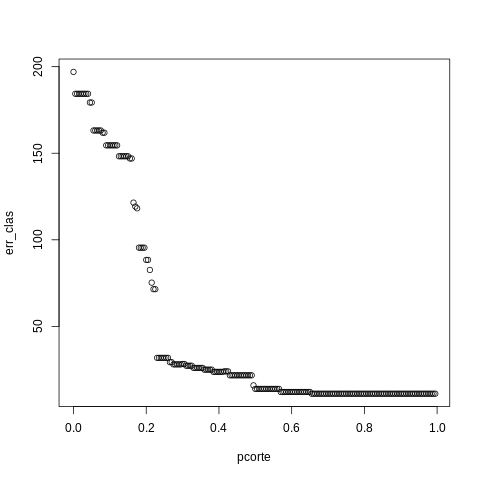

In [104]:
%%R
# dando costo 5 para clasificaciones erradas
err_clas<-NULL
pcorte<-seq(from=min(modlin$fitted.values),to=max(modlin$fitted.values),by=0.005)
for (i in 1:length(pcorte)){
	classif<-ifelse(modlin$fitted.values>pcorte[i],1,0)
	err_clas[i]<-(table(Y,classif)[1,2]+(1/5)*table(Y,classif)[2,1])/((1/5)*sum(Y==0)+sum(Y==1))*100}
plot(pcorte,err_clas)
pcorte[err_clas==min(err_clas)]
#

In [105]:
%%R
classif<-ifelse(modlin$fitted.values>pcorte[err_clas==min(err_clas)],1,0)
table(classif,Y)
#

       Y
classif   0   1
      0 161  44
      1   0   3


In [106]:
%%R
##### Selección de variables
#
## Usando stepwise por AIC
#
step(modlin, direction="both")
modlin<-glm(Y~.,data=X,family=binomial(link="logit")) 
summary(modlin)
#

Start:  AIC=236.19
Y ~ municipio_BARBACOAS + municipio_BELÉN + municipio_COLÓN + 
    municipio_CUMBAL + municipio_CUMBITARA + municipio_CaRDOBA + 
    municipio_EL.CHARCO + municipio_EL.ROSARIO + municipio_IPIALES + 
    municipio_LA.CRUZ + municipio_LA.LLANADA + municipio_LEIVA + 
    municipio_LINARES + municipio_LOS.ANDES + municipio_MAGÜÍ + 
    municipio_MALLAMA + municipio_OLAYA.HERRERA + municipio_POLICARPA + 
    municipio_PUERRES + municipio_RICAURTE + municipio_ROBERTO.PAYÁN + 
    municipio_SAMANIEGO + municipio_SAN.BERNARDO + municipio_SAN.LORENZO + 
    municipio_SAN.PABLO + municipio_SANDONÁ + municipio_SANTA.BÁRBARA + 
    municipio_SANTA.CRUZ + municipio_TUMACO + municipio_TÚQUERRES + 
    Tipo.de.área_Rural + Tipo.de.área_Urbana + condicion_Civil + 
    condicion_Fuerza.pública + genero_Femenino + genero_Masculino + 
    genero_Sin.Información


Step:  AIC=236.19
Y ~ municipio_BARBACOAS + municipio_BELÉN + municipio_COLÓN + 
    municipio_CUMBAL + municipio_CUMBITARA 

In [ ]:
%%R
install.packages("glmnet") 

R[write to console]: Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

R[write to console]: also installing the dependencies ‘iterators’, ‘foreach’, ‘shape’, ‘RcppEigen’


R[write to console]: trying URL 'https://cran.rstudio.com/src/contrib/iterators_1.0.13.tar.gz'

R[write to console]: Content type 'application/x-gzip'
R[write to console]:  length 288559 bytes (281 KB)

R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to consol

In [ ]:
%%R
## Selección de variables via Lasso
#
library(glmnet)
set.seed(100)
matX<-data.matrix(X)
cv.out<-cv.glmnet(matX,Y,alpha=1,nfolds=5,family="binomial") #alpha=1 representa o lasso, alpha=0 representa o ridge e alpha entre 0 e 1 representa o elasticnet
plot(cv.out)
bestlam<-cv.out$lambda.min
modlasso<-glmnet(matX,Y,alpha=1,lambda=bestlam,family="binomial")
coef(modlasso)

In [ ]:
%%R
## Seleción de varaibles via Ridge
#
set.seed(100)
cv.out<-cv.glmnet(matX,Y,alpha=0,nfolds=5,family="binomial") #alpha=1 representa o lasso, alpha=0 representa o ridge e alpha entre 0 e 1 representa o elasticnet
plot(cv.out)
bestlam<-cv.out$lambda.min
modridge<-glmnet(matX,Y,alpha=0,lambda=bestlam,family="binomial")
coef(modridge)
#